# A quick introduction to machine learning


- These notebooks are a brief, hands-on, introduction to machine learning.
- We will revise some of the nomenclature, principles, and applications from Valentina's presentation.

## ML will solve all of our problems, right?

![](cow.jpg)

## What is Machine Learning (ML)?

**Caveat:** I'm not a Statistician, Mathematician, or ML expert. I only play one online. You can find my work on movies and plays like "How to get by with little to no data" or "Oh gosh, the PI wants some buzz-words in the report" and "Fuzzy logic no longer does it, we need ML &rarr; AI &rarr; DL"

What is ML (a personal point of view):

* Focus on practical problems
* Learn from the data and/or make predictions with it
* Middle ground between statistics and optimization techniques
* We have fast computers now, right? Let them do the work! ([Must see JVP talk on this](https://www.youtube.com/watch?app=desktop&v=Iq9DzN6mvYA).)

**Oversimplified take:** Fit a model to data and use it to make predictions. (This is how scikit-learn designed its API BTW).

## Vocabulary 


- **parameters:** Variables that define the model and control its behavior.

- **model:** Set of mathematical equations used to approximate the data.

- **labels/classes:** Quantity/category that we want to predict

- **features:** Observations (information) used as predictors of labels/classes.

- **training:** Use **features** and known **labels/classes** to fit the **model** estimate its **parameters** (full circle, right? But why stop now?).

- **hyper-parameters:** Variables that influence the **training** and the **model** but are not estimated during training.
- **unsupervised learning:** Extract information and structure from the data without **training** with known **labels**. We will see clustering, and Principal Component Analysis (PCA).

- **supervised learning:** Fit a model using data to "train" it for making predictions. Examples: regression, classification, spam detection, recommendation systems. We'll see KNN, a classification type of ML in this tutorial.

## Unsupervised: PCA

The dataset we will use was consists of Red, Green, Blue composites (**parameters**) from plastic pellets photos. We also have some extra information on the pellet size, shape, etc.

The **labels** are the yellowing index. The goal is to predict the yellowing based the pellets image, broken down to its RGB info.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("pellets-visual-classes-rgb.csv", index_col="image").dropna()
df["yellowing index"] = df["yellowing index"].astype(int)
df

,r,g,b,size (mm),color,description,erosion,erosion index,yellowing,yellowing index
image,,,,,,,,,,
cl1_p11_moca2_deixa5_a0001,152,150,143,4.021,transparent,sphere,high erosion,3,low,1
cl1_p12_lagoinha_deixa1_g0006,221,218,219,4.244,white,light erosion,low erosion,1,low,1
cl1_p12_lagoinha_deixa1_g0007,140,137,129,3.946,white,not erosion,low erosion,1,low,1
cl1_p12_lagoinha_deixa1_g0008,188,178,146,3.948,white,moderate erosion,high erosion,3,moderate,2
cl1_p12_lagoinha_deixa2_h0004,207,200,189,6.043,white,light erosion,low erosion,1,moderate,2
...,...,...,...,...,...,...,...,...,...,...
cl1_p6_moca2_deixa3_a0006,186,193,155,4.546,transparent,cylinder,moderate erosion,2,low,1
cl1_p8_moca2_deixa5_b0001,169,168,106,3.082,transparent,sphere,low erosion,1,low,1
cl1_p8_moca2_deixa5_b0003,191,189,152,3.932,white,sphere,low erosion,1,low,1


In [3]:
import matplotlib.pyplot as plt

def histograms():
    fig, axes = plt.subplots(figsize=(11, 11), nrows=2, ncols=2)

    axes = axes.ravel()

    df["erosion"].value_counts().plot.barh(ax=axes[0], title="erosion")
    df["color"].value_counts().plot.barh(ax=axes[1], title="color")
    df["description"].value_counts().plot.barh(ax=axes[2], title="description")
    df["yellowing"].value_counts().plot.barh(ax=axes[3], title="yellowing")

    axes[1].yaxis.set_label_position("right")
    axes[1].yaxis.tick_right()

    axes[3].yaxis.set_label_position("right")
    axes[3].yaxis.tick_right()

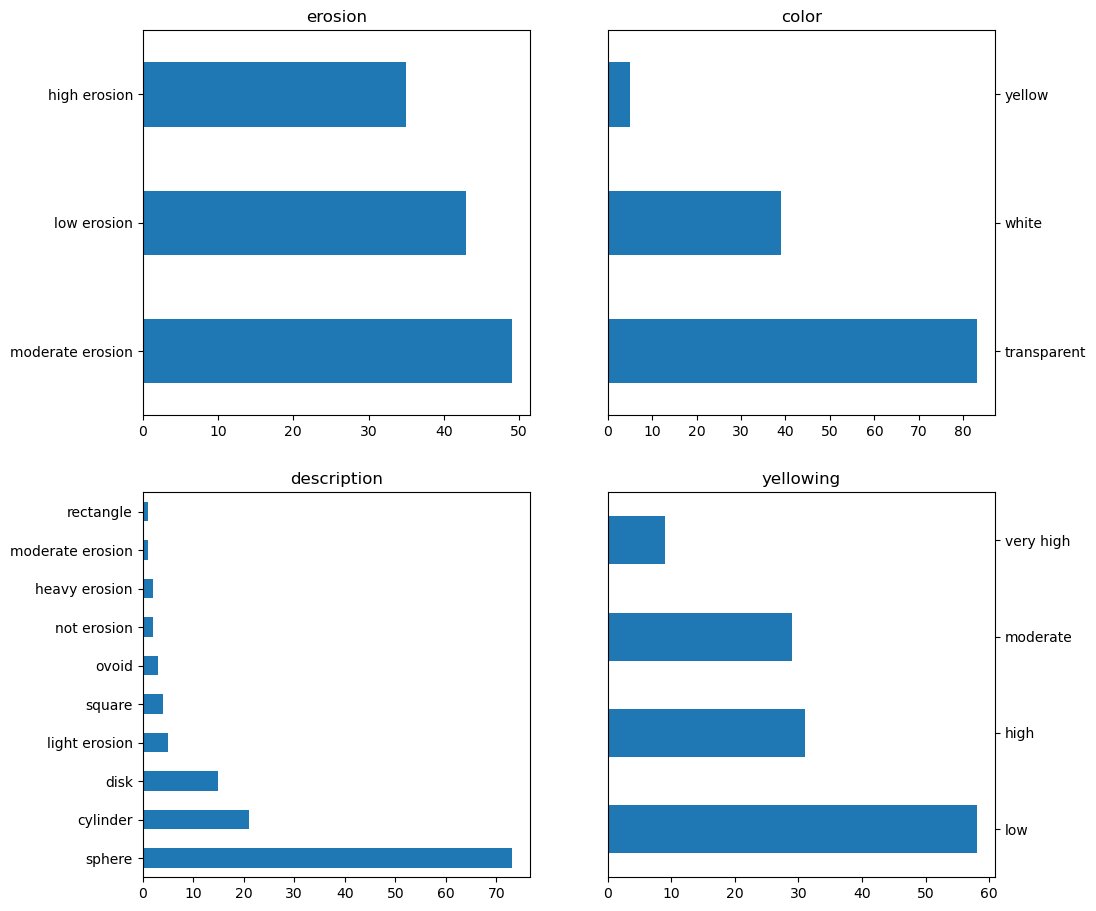

In [4]:
histograms();

We will be using only the R, G, B data for now.

In [5]:
RGB = df[["r", "g", "b"]]

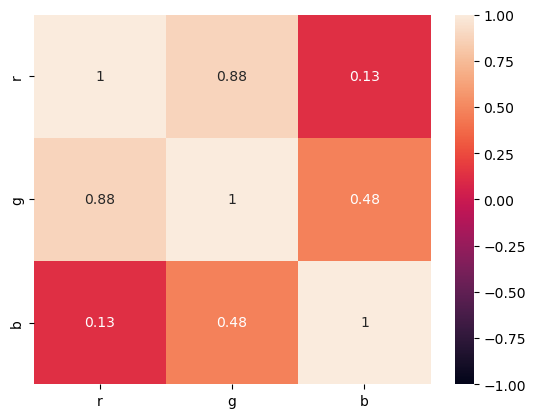

In [6]:
import numpy as np
import seaborn

corr = RGB.corr()

seaborn.heatmap(corr, vmin=-1, vmax=1, annot=True);

The first step to most ML techniques is to standardize the data. We do not want high variance data to bias our model.

In [7]:
def z_score(x):
    return (x - x.mean()) / x.std()


zs = RGB.apply(z_score).T

zs.std(axis=1)  # Should be 1

r    1.0
g    1.0
b    1.0
dtype: float64

In [8]:
zs.mean(axis=1)  # Should be zero

r    2.928541e-16
g    3.916377e-16
b   -9.616105e-17
dtype: float64

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(zs)

PCA()

The pca object, or fitted model, was designed before pandas existed and it is based on numpy arrays. We can do better nowadays and add meaningful labels to it.

In [10]:
loadings = pd.DataFrame(pca.components_.T)
loadings.index = ["PC %s" % pc for pc in loadings.index + 1]
loadings.columns = ["TS %s" % pc for pc in loadings.columns + 1]
loadings

,TS 1,TS 2,TS 3
PC 1,0.106617,-0.020035,0.798683
PC 2,0.038558,-0.015377,0.209504
PC 3,0.118255,-0.029110,0.046632
PC 4,0.032419,-0.036895,-0.017256
PC 5,0.037738,-0.033506,-0.061740
...,...,...,...
PC 123,0.037121,0.082580,-0.035151
PC 124,0.023213,0.049475,0.002244
PC 125,0.027663,0.022751,-0.017330
PC 126,-0.032039,-0.082355,-0.001499


In [11]:
PCs = np.dot(loadings.values.T, RGB)

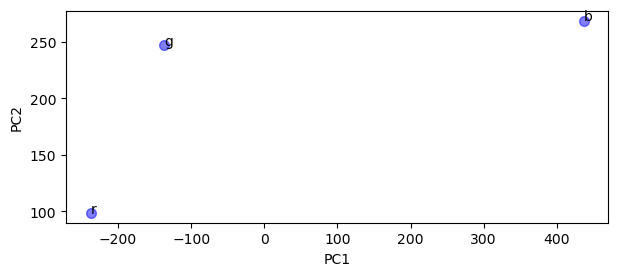

In [12]:

marker = {
    "linestyle": "none", "marker": "o", 
    "markersize": 7, "color": "blue", "alpha": 0.5,
}

fig, ax = plt.subplots(figsize=(7, 2.75))
ax.plot(PCs[0], PCs[1], label="Scores", **marker)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")

text = [ax.text(x, y, t) for x, y, t in zip(
    PCs[0], PCs[1] + 0.5, RGB.columns)]

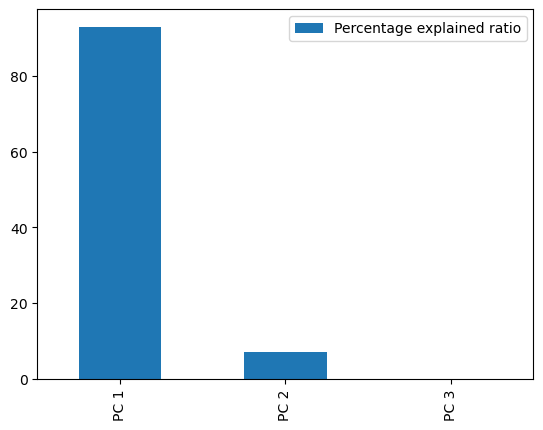

In [13]:
perc = pca.explained_variance_ratio_ * 100
perc = pd.DataFrame(
    perc,
    columns=["Percentage explained ratio"],
    index=["PC %s" % pc for pc in np.arange(len(perc)) + 1],
)
ax = perc.plot(kind="bar")

The non-projected loadings plot can help us see if the data has some sort of aggregation that we can use.

In [14]:
common = {"linestyle": "none", "markersize": 7, "alpha": 0.5}

markers = {
    0: {"color": "black", "marker": "o", "label": "no yellowing"},
    1: {"color": "red", "marker": "^", "label": "low"},
    2: {"color": "blue", "marker": "*", "label": "moderate"},
    3: {"color": "khaki", "marker": "s", "label": "high"},
    4: {"color": "darkgoldenrod", "marker": "d", "label": "very high"},
}

def unprojected_loadings():
    fig, ax = plt.subplots(figsize=(7, 7))
    for x, y, idx in zip(loadings.iloc[:, 0], loadings.iloc[:, 1], df["yellowing index"]):
        ax.plot(x, y, **common, **markers.get(idx))

    ax.set_xlabel("non-projected PC1")
    ax.set_ylabel("non-projected PC2")
    ax.axis([-1, 1, -1, 1])
    ax.axis([-0.25, 0.25, -0.4, 0.4])

    # Trick to remove duplicate labels from the for-loop.
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())
    return fig, ax

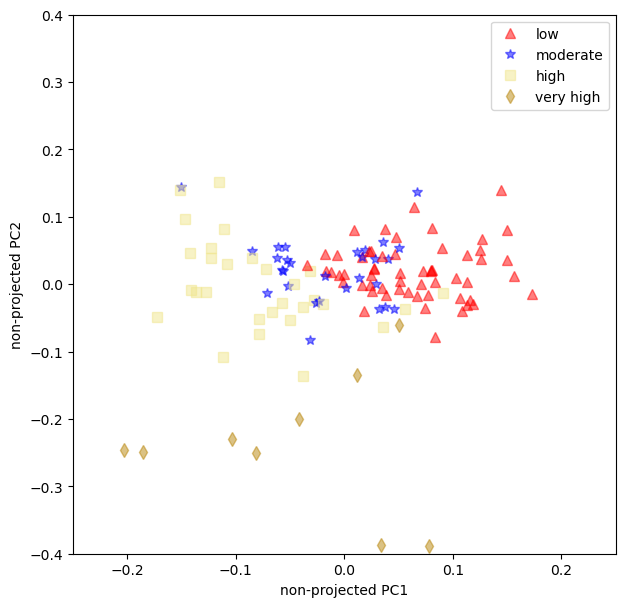

In [15]:
unprojected_loadings();

## Summary

- PCA is probably be most robust, and easy to perform, non-supervised ML technique (it has been a common technique in ocean sciences since before the ML hype);
- We learned that a single RGB value does not have enough predictive power to be used alone, we'll need at least a combination of Reds and Greens;
- The loading plot show that the moderate and the low yellowing have some overlaps. That can be troublesome when using this model for predictions.